## Create simple plot with Pandas  

### Import libraries

In [19]:
import pandas as pd

### Parameters

In [20]:
csv_in1 = '../../AI/ai-0102/2045_2017-utf8.csv'

### Read CSV file

In [21]:
df1 = pd.read_csv(csv_in1, delimiter=',', skiprows=9, header=0)
df1['Date']=pd.to_datetime(df1['Date'], format="%Y-%m-%d")
print(df1.shape)
print(df1.info())
display(df1.head())

(201, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      201 non-null    datetime64[ns]
 1   Open      201 non-null    int64         
 2   High      201 non-null    int64         
 3   Low       201 non-null    int64         
 4   Close     201 non-null    int64         
 5   Vol       201 non-null    int64         
 6   AdjClose  201 non-null    int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 11.1 KB
None


,Date,Open,High,Low,Close,Vol,AdjClose
0,2017-01-04,9340,9340,9270,9270,6,9270
1,2017-01-05,9260,9340,9250,9260,22,9260
2,2017-01-06,9300,9380,9300,9380,69,9380
3,2017-01-10,9380,9390,9320,9370,465,9370
4,2017-01-11,9400,9520,9400,9490,233,9490


### Add 25days moving average line  

In [22]:
df1['25d_mov_ave'] = df1['AdjClose'].rolling(window=25).mean()
display(df1.head(30))

,Date,Open,High,Low,Close,Vol,AdjClose,25d_mov_ave
0,2017-01-04,9340,9340,9270,9270,6,9270,NaN
1,2017-01-05,9260,9340,9250,9260,22,9260,NaN
2,2017-01-06,9300,9380,9300,9380,69,9380,NaN
3,2017-01-10,9380,9390,9320,9370,465,9370,NaN
4,2017-01-11,9400,9520,9400,9490,233,9490,NaN
5,2017-01-12,9450,9550,9450,9550,542,9550,NaN
6,2017-01-13,9480,9480,9480,9480,10,9480,NaN
7,2017-01-16,9320,9320,9300,9300,4,9300,NaN
8,2017-01-23,9450,9450,9350,9350,19,9350,NaN
9,2017-01-25,9350,9350,9330,9330,24,9330,NaN


### Line plot  

<AxesSubplot:xlabel='Date'>

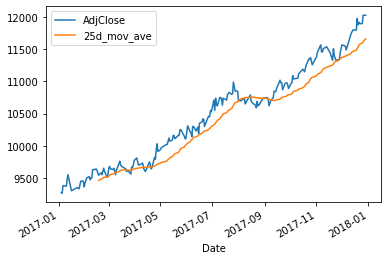

In [23]:
df1.plot.line('Date', ['AdjClose', '25d_mov_ave'])

### Scatter plot  

<AxesSubplot:xlabel='High', ylabel='Low'>

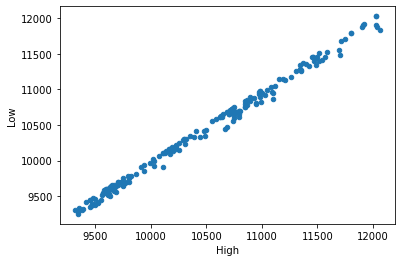

In [24]:
df1.plot.scatter('High', 'Low')

In [25]:
csv_in2 = '../../AI/ai-0102/1393_2017-utf8.csv'
df2 = pd.read_csv(csv_in2, delimiter=',', skiprows=9, header=0)
df2['Date']=pd.to_datetime(df2['Date'], format="%Y-%m-%d")
print(df2.shape)
print(df2.info())
display(df2.head())

(139, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      139 non-null    datetime64[ns]
 1   Open      139 non-null    int64         
 2   High      139 non-null    int64         
 3   Low       139 non-null    int64         
 4   Close     139 non-null    int64         
 5   Vol       139 non-null    int64         
 6   AdjClose  139 non-null    int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 7.7 KB
None


,Date,Open,High,Low,Close,Vol,AdjClose
0,2017-01-04,25500,25520,25410,25520,21,25520
1,2017-01-05,25520,25520,25200,25220,71,25220
2,2017-01-06,25150,25170,25150,25170,3,25170
3,2017-01-10,25170,25170,25010,25010,57,25010
4,2017-01-11,25040,25040,25040,25040,1,25040


In [26]:
df12 = pd.merge(df1.loc[:,'Date':'AdjClose'], df2, on='Date')
display(df12.head())

,Date,Open_x,High_x,Low_x,Close_x,Vol_x,AdjClose_x,Open_y,High_y,Low_y,Close_y,Vol_y,AdjClose_y
0,2017-01-04,9340,9340,9270,9270,6,9270,25500,25520,25410,25520,21,25520
1,2017-01-05,9260,9340,9250,9260,22,9260,25520,25520,25200,25220,71,25220
2,2017-01-06,9300,9380,9300,9380,69,9380,25150,25170,25150,25170,3,25170
3,2017-01-10,9380,9390,9320,9370,465,9370,25170,25170,25010,25010,57,25010
4,2017-01-11,9400,9520,9400,9490,233,9490,25040,25040,25040,25040,1,25040


<AxesSubplot:xlabel='AdjClose_x', ylabel='AdjClose_y'>

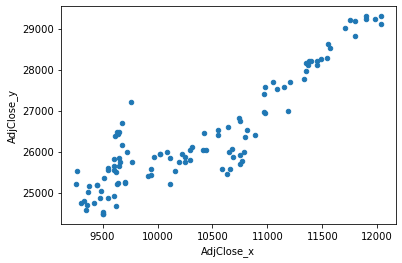

In [27]:
df12.plot.scatter('AdjClose_x','AdjClose_y')